In [86]:
import sys
import os

from config_build import *

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from docx import Document
from io import BytesIO


In [87]:

# 读取配置文件
config_df = pd.read_excel(r'/Users/harvin/code/自动报告产品开发-产业链@20220830/data/pmi_config.xlsx',header=0, sheet_name='指标数据')

# 显示数据或进行其他操作
# print(config_df.head())  # 显示前几行数据

# 选择行业编码为 'C'（制造业）的行
manufacturing_data = config_df[(config_df['产业名称'] == '制造业采购经理指数') & (config_df['指标名称'] == 'PMI指数_当期值')]

#PMI指数_当期值

# 显示制造业的数据或进行其他操作


In [88]:
print(manufacturing_data)  # 显示前几行数据

                指标编码       指标名称    地区编码 行业编码   产业编码       产业名称   报告期编码   数据值  \
168109  BJ_203700102  PMI指数_当期值  000000  NaN  X0201  制造业采购经理指数  200501  54.7   
168110  BJ_203700102  PMI指数_当期值  000000  NaN  X0201  制造业采购经理指数  200502  54.5   
168111  BJ_203700102  PMI指数_当期值  000000  NaN  X0201  制造业采购经理指数  200503  57.9   
168112  BJ_203700102  PMI指数_当期值  000000  NaN  X0201  制造业采购经理指数  200504  56.7   
168113  BJ_203700102  PMI指数_当期值  000000  NaN  X0201  制造业采购经理指数  200505  52.9   
...              ...        ...     ...  ...    ...        ...     ...   ...   
171117  BJ_203700102  PMI指数_当期值  110000  NaN  X0201  制造业采购经理指数  202305  50.7   
171118  BJ_203700102  PMI指数_当期值  110000  NaN  X0201  制造业采购经理指数  202306  50.0   
171119  BJ_203700102  PMI指数_当期值  110000  NaN  X0201  制造业采购经理指数  202307  50.0   
171120  BJ_203700102  PMI指数_当期值  110000  NaN  X0201  制造业采购经理指数  202308  48.6   
171121  BJ_203700102  PMI指数_当期值  110000  NaN  X0201  制造业采购经理指数  202309  50.2   

       计量单位名称   创建人 删除标记  
168109      

/var/folders/4m/3yfnhmtx0vx1d01xd38_4r5r0000gn/T/ipykernel_21426/2081605554.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manufacturing_data['报告期编码'] = pd.to_datetime(manufacturing_data['报告期编码'], format='%Y%m', errors='coerce')


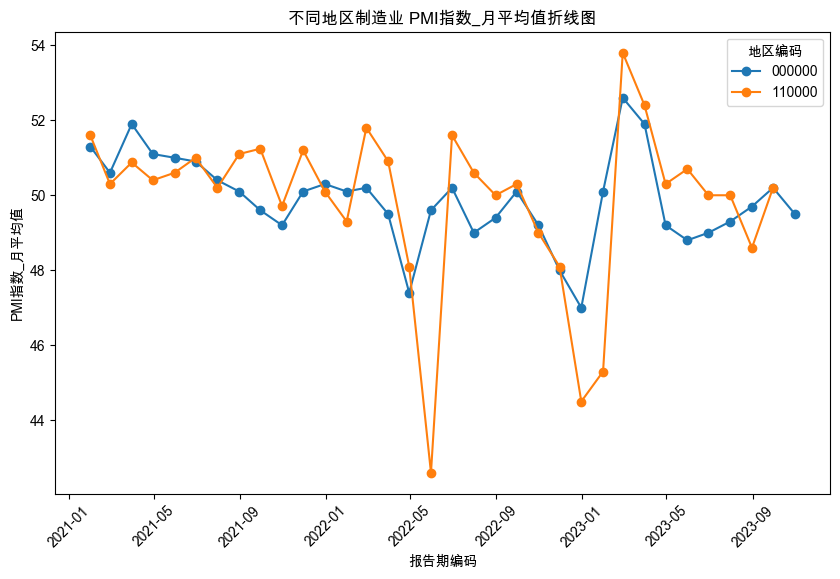

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from matplotlib.dates import DateFormatter, MonthLocator  # Add this line
from docx import Document
from io import BytesIO

# 设置中文显示
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']  # 设置中文字体为系统自带的中文字体，如 macOS 的 Arial Unicode MS

# 读取配置文件
config_df = pd.read_excel(r'/Users/harvin/code/自动报告产品开发-产业链@20220830/data/pmi_config.xlsx', header=0, sheet_name='指标数据')

manufacturing_data = config_df[(config_df['产业名称'] == '制造业采购经理指数') & (config_df['指标名称'] == 'PMI指数_当期值')]

# 筛选出 2021 年及之后的数据
manufacturing_data['报告期编码'] = pd.to_datetime(manufacturing_data['报告期编码'], format='%Y%m', errors='coerce')
manufacturing_data = manufacturing_data[manufacturing_data['报告期编码'].dt.year >= 2021]

# 将报告期编码转换为日期格式，跳过无法转换的值并输出异常信息
errors = []
try:
    manufacturing_data['报告期编码'] = pd.to_datetime(manufacturing_data['报告期编码'], format='%Y%m', errors='coerce')
except Exception as e:
    errors.append(str(e))

# 去除无法转换为日期的行
manufacturing_data.dropna(subset=['报告期编码'], inplace=True)

# 转换数据值列为数值型，跳过无法转换的值
manufacturing_data['数据值'] = pd.to_numeric(manufacturing_data['数据值'], errors='coerce')

# 去除非数值型数据行
manufacturing_data.dropna(subset=['数据值'], inplace=True)

# 按地区编码和月份进行数据分组，计算每个月的平均值
grouped_data = manufacturing_data.groupby(['地区编码', pd.Grouper(key='报告期编码', freq='M')])['数据值'].mean().reset_index()

# 创建图表
plt.figure(figsize=(10, 6))  # 设置图形大小

# 遍历分组数据并画折线图
for region_code, group_data in grouped_data.groupby('地区编码'):
    plt.plot(group_data['报告期编码'], group_data['数据值'], label=region_code, marker='o', linestyle='-')

# 设置图例、标题和坐标轴标签（使用中文）
plt.legend(title='地区编码')  # 添加图例
plt.title('不同地区制造业 PMI指数_月平均值折线图')  # 设置标题
plt.xlabel('报告期编码')  # 设置 x 轴标签
plt.ylabel('PMI指数_月平均值')  # 设置 y 轴标签
plt.xticks(rotation=45)  # 设置 x 轴刻度角度

# 输出无法转换的异常信息
if errors:
    print("无法转换为日期的值列表：")
    for error in errors:
        print(error)

# 保存图表到 BytesIO 对象
image_stream = BytesIO()
plt.savefig(image_stream, format='png')
image_stream.seek(0)

# 创建 Word 文档
doc = Document()
doc.add_paragraph("制造业 PMI指数_月平均值折线图")

# 将图表保存到 Word 文档中
doc.add_picture(image_stream)

# 保存 Word 文档
doc.save('PMI月均值折线图.docx')


/var/folders/4m/3yfnhmtx0vx1d01xd38_4r5r0000gn/T/ipykernel_21426/2981110004.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manufacturing_data['报告期编码'] = pd.to_datetime(manufacturing_data['报告期编码'], format='%Y%m', errors='coerce')


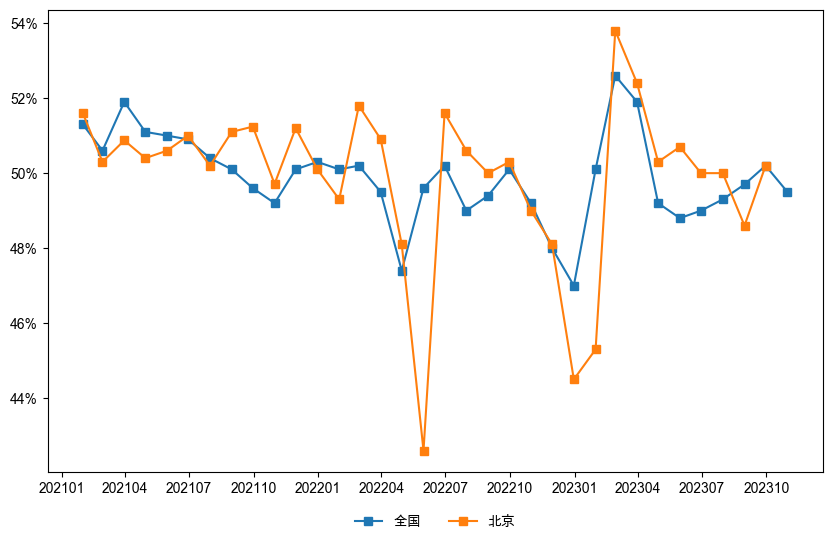

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from matplotlib.dates import DateFormatter, MonthLocator  # Add this line
from matplotlib.ticker import FuncFormatter # 用于改y轴格式
from docx import Document
from io import BytesIO

# 读取配置文件
config_df = pd.read_excel(r'/Users/harvin/code/自动报告产品开发-产业链@20220830/data/pmi_config.xlsx', header=0, sheet_name='指标数据')

# 选择行业编码为 'C'（制造业）且指标名称为 'PMI指数_当期值' 的行
manufacturing_data = config_df[(config_df['产业名称'] == '制造业采购经理指数') & (config_df['指标名称'] == 'PMI指数_当期值')]

# 筛选出 2021 年及之后的数据
manufacturing_data['报告期编码'] = pd.to_datetime(manufacturing_data['报告期编码'], format='%Y%m', errors='coerce')
manufacturing_data = manufacturing_data[manufacturing_data['报告期编码'].dt.year >= 2021]

# 去除非日期值的行
manufacturing_data.dropna(subset=['报告期编码'], inplace=True)

# 转换数据值列为数值型，跳过无法转换的值
manufacturing_data['数据值'] = pd.to_numeric(manufacturing_data['数据值'], errors='coerce')

# 去除非数值型数据行
manufacturing_data.dropna(subset=['数据值'], inplace=True)

# 筛选出全国和北京的数据
national_data = manufacturing_data[manufacturing_data['地区编码'] == '000000']
beijing_data = manufacturing_data[manufacturing_data['地区编码'] == '110000']

# 按地区编码和月份进行数据分组，计算每个月的平均值
grouped_national = national_data.groupby(pd.Grouper(key='报告期编码', freq='1M'))['数据值'].mean().reset_index()
grouped_beijing = beijing_data.groupby(pd.Grouper(key='报告期编码', freq='1M'))['数据值'].mean().reset_index()

# 创建图表
plt.figure(figsize=(10, 6))  # 设置图形大小

# 绘制全国数据，使用方形标记点
plt.plot(grouped_national['报告期编码'], grouped_national['数据值'], label='全国', marker='s', linestyle='-')

# 绘制北京数据，使用方形标记点
plt.plot(grouped_beijing['报告期编码'], grouped_beijing['数据值'], label='北京', marker='s', linestyle='-')

# 设置图例、标题和坐标轴标签（使用中文）
plt.legend(loc='lower center', ncol=2, frameon=False,bbox_to_anchor=(0.5, -0.15),)  # 添加图例，放在图的下方
# plt.title('全国和北京制造业 PMI指数月平均值折线图')  # 设置标题
# plt.xlabel('报告期编码')  # 设置 x 轴标签
# plt.ylabel('PMI指数_月平均值')  # 设置 y 轴标签
# plt.xticks(rotation=45)  # 设置 x 轴刻度角度

# 设置 Y 轴标签格式为百分比
def y_fmt(y, pos):
    return f'{y:.0f}%'

plt.gca().yaxis.set_major_formatter(FuncFormatter(y_fmt))

# 获取 x 轴的最小和最大日期
x_min = min(min(grouped_national['报告期编码']), min(grouped_beijing['报告期编码']))
x_max = max(max(grouped_national['报告期编码']), max(grouped_beijing['报告期编码']))


# 获取 x 轴的刻度
x_ticks = pd.date_range(start=x_min, end=x_max, freq='M').strftime('%Y-%m').tolist()
x_ticks = [tick for tick in x_ticks if tick[-2:] in ['01', '04', '07', '10']]  # 保留 1、3、7、10 月份的刻度


# 设置 X 轴的刻度和标签
plt.xticks(x_ticks)
# 设置 X 轴的刻度为月份，间隔为3个月
# plt.gca().xaxis.set_major_locator(MonthLocator(bymonthday=1, interval=3))
date_format = DateFormatter("%Y%m")  # 设置日期格式为年月
plt.gca().xaxis.set_major_formatter(date_format)
# 保存图表到 BytesIO 对象
image_stream = BytesIO()
plt.savefig(image_stream, format='png')
image_stream.seek(0)

# 创建 Word 文档
doc = Document()
doc.add_paragraph("制造业 PMI指数_月平均值折线图")

# 将图表保存到 Word 文档中
doc.add_picture(image_stream)

# 保存 Word 文档
doc.save('PMI月均值折线图.docx')

# 合并全国和北京的数据
merged_data = pd.concat([grouped_national, grouped_beijing['数据值']], axis=1)
merged_data.columns = ['报告期编码', '全国', '北京']

# 保存合并后的数据为一个 CSV 文件，并指定编码为 UTF-8
merged_data.to_csv('national_and_beijing_data.csv', index=False, encoding='utf-8-sig')




/var/folders/4m/3yfnhmtx0vx1d01xd38_4r5r0000gn/T/ipykernel_21426/1266481360.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['报告期编码'] = pd.to_datetime(selected_data['报告期编码'], format='%Y%m', errors='coerce')


                指标编码       指标名称    地区编码 行业编码   产业编码     产业名称   报告期编码   数据值  \
168335  BJ_203700102  PMI指数_当期值  000000  NaN  X0214     生产指数  200501  57.6   
168336  BJ_203700102  PMI指数_当期值  000000  NaN  X0214     生产指数  200502  55.6   
168337  BJ_203700102  PMI指数_当期值  000000  NaN  X0214     生产指数  200503  65.2   
168338  BJ_203700102  PMI指数_当期值  000000  NaN  X0214     生产指数  200504  62.7   
168339  BJ_203700102  PMI指数_当期值  000000  NaN  X0214     生产指数  200505    57   
...              ...        ...     ...  ...    ...      ...     ...   ...   
170379  BJ_203700102  PMI指数_当期值  000000  NaN  X0223  原材料库存指数  202303  48.3   
170380  BJ_203700102  PMI指数_当期值  000000  NaN  X0223  原材料库存指数  202304  47.9   
170381  BJ_203700102  PMI指数_当期值  000000  NaN  X0223  原材料库存指数  202305  47.6   
170382  BJ_203700102  PMI指数_当期值  000000  NaN  X0223  原材料库存指数  202306  47.4   
170383  BJ_203700102  PMI指数_当期值  000000  NaN  X0223  原材料库存指数  202307  48.2   

       计量单位名称   创建人 删除标记  
168335      %  9003    0  
168336   

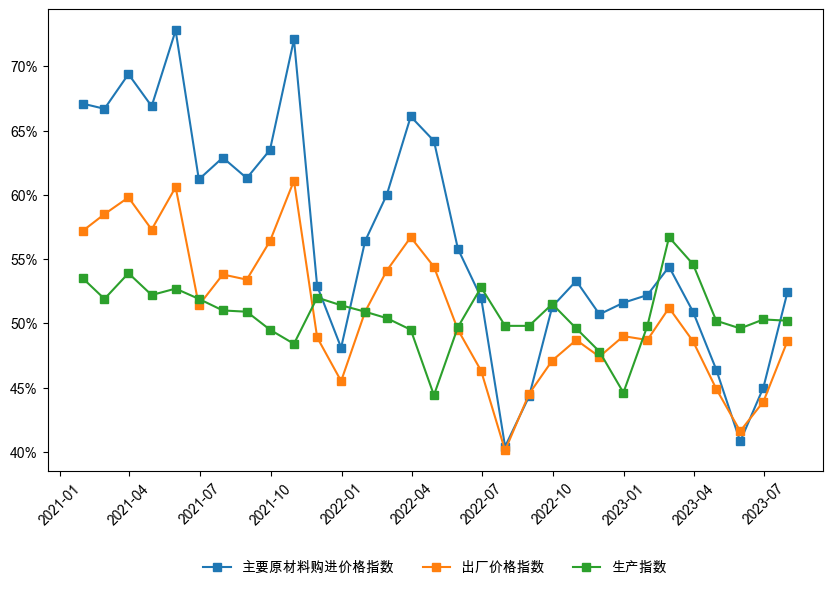

In [91]:
# 选择特定产业名称的数据

desired_industries = [ '生产指数','新订单指数','原材料库存指数''主要原材料购进价格指数', '供应商配送时间指数']
selected_data = config_df[config_df['产业名称'].isin(desired_industries)]
print(selected_data)

# 筛选出 2021 年及之后的数据
selected_data['报告期编码'] = pd.to_datetime(selected_data['报告期编码'], format='%Y%m', errors='coerce')
selected_data = selected_data[selected_data['报告期编码'].dt.year >= 2021]

# 去除非日期值的行
selected_data.dropna(subset=['报告期编码'], inplace=True)

# 转换数据值列为数值型，跳过无法转换的值
selected_data['数据值'] = pd.to_numeric(selected_data['数据值'], errors='coerce')

# 去除非数值型数据行
selected_data.dropna(subset=['数据值'], inplace=True)

# 按指标名称和月份进行数据分组，计算每个月的平均值
grouped_data = selected_data.groupby(['产业名称', pd.Grouper(key='报告期编码', freq='1M')])['数据值'].mean().reset_index()

# 创建图表
plt.figure(figsize=(10, 6))

# 针对每个指标绘制折线图
for index_name in desired_indices:
    index_data = grouped_data[grouped_data['产业名称'] == index_name]
    plt.plot(index_data['报告期编码'], index_data['数据值'], label=index_name, marker='s', linestyle='-')

# 设置图例、标题和坐标轴标签（使用中文）
plt.legend(loc='lower center', ncol=10, frameon=False, bbox_to_anchor=(0.5, -0.25))
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:.0f}%'))
plt.xticks(rotation=45)
date_format = DateFormatter("%Y-%m")
plt.gca().xaxis.set_major_formatter(date_format)

# 保存图表到 BytesIO 对象
image_stream = BytesIO()
plt.savefig(image_stream, format='png')
image_stream.seek(0)

# 创建 Word 文档
doc = Document()
doc.add_paragraph("主要指数月平均值折线图")

# 将图表保存到 Word 文档中
doc.add_picture(image_stream)

# 保存 Word 文档
doc.save('主要指数月均值折线图.docx')

# 保存处理后的数据为 CSV 文件，并指定编码为 UTF-8
grouped_data.to_csv('main_indices_data.csv', index=False, encoding='utf-8-sig')


/var/folders/4m/3yfnhmtx0vx1d01xd38_4r5r0000gn/T/ipykernel_21426/2521838450.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['报告期编码'] = pd.to_datetime(selected_data['报告期编码'], format='%Y%m', errors='coerce')


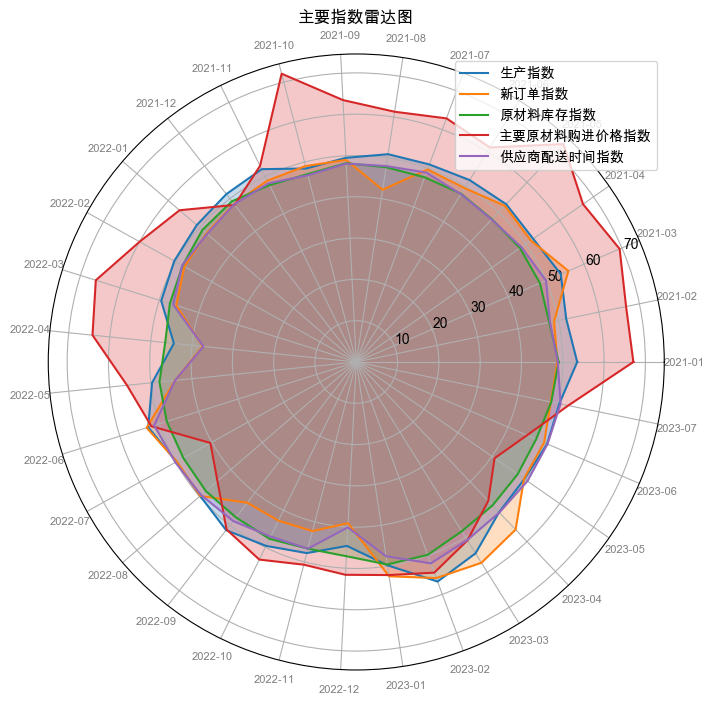

In [92]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from io import BytesIO
from docx import Document

# 假设数据已经加载到 config_df 中

# 选择特定产业名称的数据
desired_industries = ['生产指数', '新订单指数', '原材料库存指数', '主要原材料购进价格指数', '供应商配送时间指数']
selected_data = config_df[config_df['产业名称'].isin(desired_industries)]

# 筛选出 2021 年及之后的数据
selected_data['报告期编码'] = pd.to_datetime(selected_data['报告期编码'], format='%Y%m', errors='coerce')
selected_data = selected_data[selected_data['报告期编码'].dt.year >= 2021]

# 去除非日期值的行
selected_data.dropna(subset=['报告期编码'], inplace=True)

# 转换数据值列为数值型，跳过无法转换的值
selected_data['数据值'] = pd.to_numeric(selected_data['数据值'], errors='coerce')

# 去除非数值型数据行
selected_data.dropna(subset=['数据值'], inplace=True)

# 按指标名称和月份进行数据分组，计算每个月的平均值
grouped_data = selected_data.groupby(['产业名称', pd.Grouper(key='报告期编码', freq='1M')])['数据值'].mean().reset_index()

# 创建雷达图
plt.figure(figsize=(8, 8))

# 针对每个指标绘制雷达图
for index_name in desired_industries:
    index_data = grouped_data[grouped_data['产业名称'] == index_name]
    values = index_data['数据值'].tolist()
    num_vars = len(values)

    # 计算角度
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

    # 为了闭合图形，需要重新添加起始点值
    values += values[:1]
    angles += angles[:1]

    ax = plt.subplot(111, polar=True)
    plt.xticks(angles[:-1], index_data['报告期编码'].dt.strftime('%Y-%m').tolist(), color='grey', size=8)
    ax.plot(angles, values, label=index_name)
    ax.fill(angles, values, alpha=0.25)

# 设置图例、标题
plt.legend(loc='upper right')
plt.title("主要指数雷达图")

# 保存图表到 BytesIO 对象
image_stream = BytesIO()
plt.savefig(image_stream, format='png')
image_stream.seek(0)

# 创建 Word 文档
doc = Document()
doc.add_paragraph("主要指数雷达图")

# 将图表保存到 Word 文档中
doc.add_picture(image_stream)

# 保存 Word 文档
doc.save('主要指数雷达图.docx')

# 保存处理后的数据为 CSV 文件，并指定编码为 UTF-8
grouped_data.to_csv('main_indices_data.csv', index=False, encoding='utf-8-sig')


In [105]:
import pandas as pd

# 假设 config_df 包含的字段为：'地区编码'、'产业名称'、'数据值'、'报告期编码'

# desired_industries 列表中包含了指定的产业名称
desired_industries = ['生产指数', '新订单指数', '原材料库存指数', '主要原材料购进价格指数', '供应商配送时间指数']

# 选择特定产业名称的数据
selected_data = config_df[config_df['产业名称'].isin(desired_industries)]

# 筛选出 2021 年及之后的数据
selected_data['报告期编码'] = pd.to_datetime(selected_data['报告期编码'], format='%Y%m', errors='coerce')
selected_data = selected_data[selected_data['报告期编码'].dt.year >= 2021]

# 去除非日期值的行
selected_data.dropna(subset=['报告期编码'], inplace=True)

# 转换数据值列为数值型，跳过无法转换的值
selected_data['数据值'] = pd.to_numeric(selected_data['数据值'], errors='coerce')

# 去除非数值型数据行
selected_data.dropna(subset=['数据值'], inplace=True)

# 按指标名称、地区编码和月份进行数据分组，计算每个月的平均值，并保留地区编码列
grouped_data = selected_data.groupby(['产业名称', '地区编码', pd.Grouper(key='报告期编码', freq='1M')])['数据值'].mean().reset_index()


# 获取最新一个月的数据
latest_month = grouped_data['报告期编码'].max()
latest_data = grouped_data[grouped_data['报告期编码'] == latest_month]

# 输出最新数据的列名和部分数据，确认是否包含 '地区编码' 列
print(latest_data.columns)
print(latest_data.head())


# 筛选出全国和北京的最新数据进行对比
national_latest_data = latest_data[latest_data['地区编码'] == '000000']
beijing_latest_data = latest_data[latest_data['地区编码'] == '110000']

# 计算全国和北京最新数据的对比
for index_name in desired_industries:
    national_latest = national_latest_data[national_latest_data['产业名称'] == index_name]['数据值'].iloc[0]
    beijing_latest = beijing_latest_data[beijing_latest_data['产业名称'] == index_name]['数据值'].iloc[0]

    diff = beijing_latest - national_latest
    
    print(f"{index_name}在全国最新数据为{national_latest}，北京最新数据为{beijing_latest}，差值为{diff}")


Index(['产业名称', '地区编码', '报告期编码', '数据值'], dtype='object')
            产业名称    地区编码      报告期编码   数据值
30   主要原材料购进价格指数  000000 2023-07-31  52.4
61     供应商配送时间指数  000000 2023-07-31  50.5
92       原材料库存指数  000000 2023-07-31  48.2
123        新订单指数  000000 2023-07-31  48.1
154         生产指数  000000 2023-07-31  50.2


/var/folders/4m/3yfnhmtx0vx1d01xd38_4r5r0000gn/T/ipykernel_21426/2543627116.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['报告期编码'] = pd.to_datetime(selected_data['报告期编码'], format='%Y%m', errors='coerce')


IndexError: single positional indexer is out-of-bounds

In [109]:
import pandas as pd

# 假设 config_df 包含的字段为：'地区编码'、'产业名称'、'数据值'、'报告期编码'

# 假设数据已经加载到 config_df 中

# 选择特定产业名称的数据
desired_industries = ['生产指数', '新订单指数', '原材料库存指数', '主要原材料购进价格指数', '供应商配送时间指数']
selected_data = config_df[config_df['产业名称'].isin(desired_industries)]

# 筛选出 2021 年及之后的数据
selected_data['报告期编码'] = pd.to_datetime(selected_data['报告期编码'], format='%Y%m', errors='coerce')
selected_data = selected_data[selected_data['报告期编码'].dt.year >= 2021]

# 去除非日期值的行
selected_data.dropna(subset=['报告期编码'], inplace=True)

# 转换数据值列为数值型，跳过无法转换的值
selected_data['数据值'] = pd.to_numeric(selected_data['数据值'], errors='coerce')

# 去除非数值型数据行
selected_data.dropna(subset=['数据值'], inplace=True)

# 按指标名称和月份进行数据分组，计算每个月的平均值
# 按指标名称、地区编码和月份进行数据分组，计算每个月的平均值，并保留地区编码列
grouped_data = selected_data.groupby(['产业名称', '地区编码', pd.Grouper(key='报告期编码', freq='1M')])['数据值'].mean().reset_index()



# 获取最新一个月的数据
latest_month = grouped_data['报告期编码'].max()
latest_data = grouped_data[grouped_data['报告期编码'] == latest_month]


# 筛选出全国和北京的最新数据进行对比
national_latest_data = latest_data[latest_data['地区编码'] == '000000']
beijing_latest_data = latest_data[latest_data['地区编码'] == '110000']


/var/folders/4m/3yfnhmtx0vx1d01xd38_4r5r0000gn/T/ipykernel_21426/800749342.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['报告期编码'] = pd.to_datetime(selected_data['报告期编码'], format='%Y%m', errors='coerce')


In [110]:
national_latest_data

,产业名称,地区编码,报告期编码,数据值
30,主要原材料购进价格指数,000000,2023-07-31,52.4
61,供应商配送时间指数,000000,2023-07-31,50.5
92,原材料库存指数,000000,2023-07-31,48.2
123,新订单指数,000000,2023-07-31,48.1
154,生产指数,000000,2023-07-31,50.2


In [162]:
import pandas as pd

# 假设 config_df 包含的字段为：'地区编码'、'产业名称'、'数据值'、'报告期编码'
# 假设数据已经加载到 config_df 中

# 选择特定产业名称的数据
desired_industries = ['生产指数', '新订单指数', '原材料库存指数', '主要原材料购进价格指数', '供应商配送时间指数']
selected_data = config_df[config_df['产业名称'].isin(desired_industries)]

# 筛选出 2021 年及之后的数据
selected_data['报告期编码'] = pd.to_datetime(selected_data['报告期编码'], format='%Y%m', errors='coerce')
selected_data = selected_data[selected_data['报告期编码'].dt.year >= 2021]

# 去除非日期值的行
selected_data.dropna(subset=['报告期编码'], inplace=True)

# 转换数据值列为数值型，跳过无法转换的值
selected_data['数据值'] = pd.to_numeric(selected_data['数据值'], errors='coerce')

# 去除非数值型数据行
selected_data.dropna(subset=['数据值'], inplace=True)

# 按指标名称和月份进行数据分组，计算每个月的平均值
# 按指标名称、地区编码和月份进行数据分组，计算每个月的平均值，并保留地区编码列
grouped_data = selected_data.groupby(['产业名称', '地区编码', pd.Grouper(key='报告期编码', freq='1M')])['数据值'].mean().reset_index()
\
pivot_data=grouped_data 
pivot_data['报告期编码']  = grouped_data['报告期编码'].dt.to_period('M')

# 重新命名列名，确保列名符合 'YYYY-MM' 的格式
# pivot_data.columns = pivot_data.columns.strftime('%Y-%m') if isinstance(pivot_data.columns, pd.DatetimeIndex) else pivot_data.columns

# 获取你希望对比的两个月份的数据，这里假设是2023年7月和2023年5月的数据
selected_month_1 = '2023-07'
selected_month_2 = '2023-05'

# 从数据中筛选出全国和北京的数据，并进行对比
national_data = pivot_data[pivot_data['地区编码'] == '000000']
beijing_data = pivot_data[pivot_data['地区编码'] == '110000']
print(f"数据框中的列名：{pivot_data.columns}")
# 将报告期编码列转换为字符串格式的月份
pivot_data['报告期编码'] = pivot_data['报告期编码'].astype(str)

# 获取你希望对比的两个月份的数据，这里假设是 '2023-07' 和 '2023-05'
selected_month_1 = '2023-07'
selected_month_2 = '2023-05'

# 从数据中筛选出全国和北京的数据，并进行对比
national_data = pivot_data[pivot_data['地区编码'] == '000000']
beijing_data = pivot_data[pivot_data['地区编码'] == '110000']

# 选择特定月份的数据
national_month_1_data = national_data[national_data['报告期编码'] == selected_month_1]
national_month_2_data = national_data[national_data['报告期编码'] == selected_month_2]
beijing_month_1_data = beijing_data[beijing_data['报告期编码'] == selected_month_1]
beijing_month_2_data = beijing_data[beijing_data['报告期编码'] == selected_month_2]


for index_name in desired_industries:
    national_index_month_1 = national_month_1_data[national_month_1_data['产业名称'] == index_name]
    national_index_month_2 = national_month_2_data[national_month_2_data['产业名称'] == index_name]
    beijing_index_month_1 = beijing_month_1_data[beijing_month_1_data['产业名称'] == index_name]
    beijing_index_month_2 = beijing_month_2_data[beijing_month_2_data['产业名称'] == index_name]

    
    nation_value1 = national_index_month_1['数据值'].iloc[0]
    nation_value2 = national_index_month_2['数据值'].iloc[0]
    beijing_value1 = beijing_index_month_1['数据值'].iloc[0]

    print(nation_value1,nation_value2,beijing_value1)

    # 然后在此处处理值，例如计算差值等
    diff_national = nation_value1 - nation_value2
    diff_beijing = beijing_value1 - nation_value2
    
    print(f"对于产业 '{index_name}':")
    print(f"全国在 {selected_month_1} 和 {selected_month_2} 对比，差值为 {diff_national}")
    print(f"北京在 {selected_month_1} 和 {selected_month_2} 对比，差值为 {diff_beijing}")



数据框中的列名：Index(['产业名称', '地区编码', '报告期编码', '数据值'], dtype='object')


/var/folders/4m/3yfnhmtx0vx1d01xd38_4r5r0000gn/T/ipykernel_21426/1858975412.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['报告期编码'] = pd.to_datetime(selected_data['报告期编码'], format='%Y%m', errors='coerce')


IndexError: single positional indexer is out-of-bounds

In [146]:
national_month_2_data

,产业名称,地区编码,报告期编码,数据值
28,主要原材料购进价格指数,000000,2023-05,40.8
59,供应商配送时间指数,000000,2023-05,50.5
90,原材料库存指数,000000,2023-05,47.6
121,新订单指数,000000,2023-05,49.5
152,生产指数,000000,2023-05,49.6
